# Visualize a filter

In [40]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt

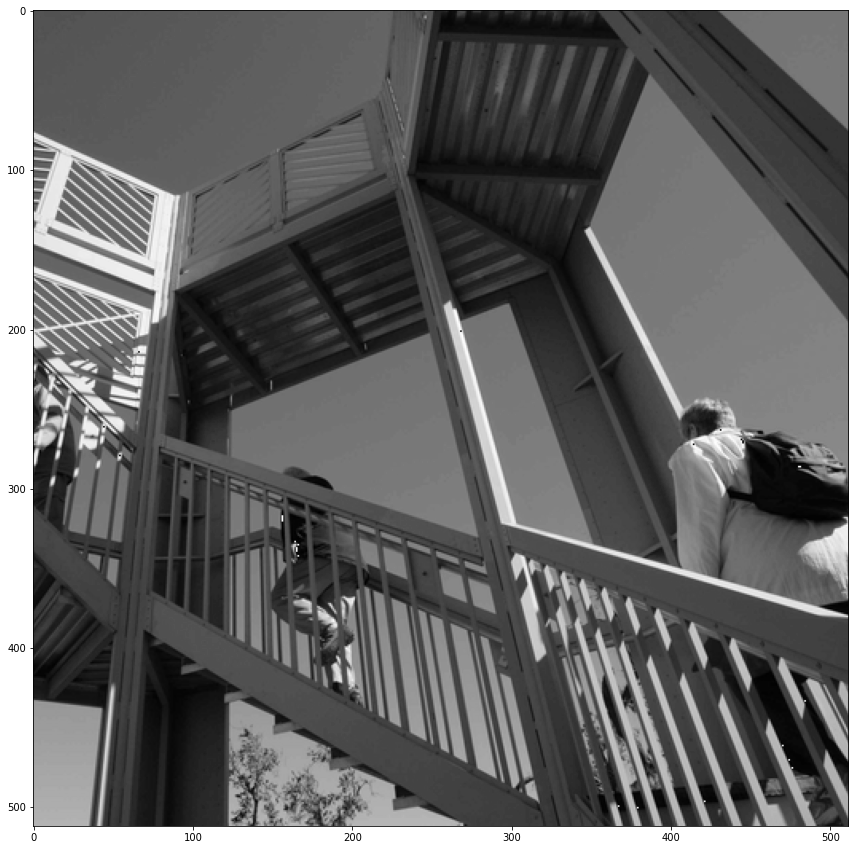

In [41]:
fig = plt.figure(figsize=(15, 15))
plt.gray()
plt.imshow(misc.ascent())

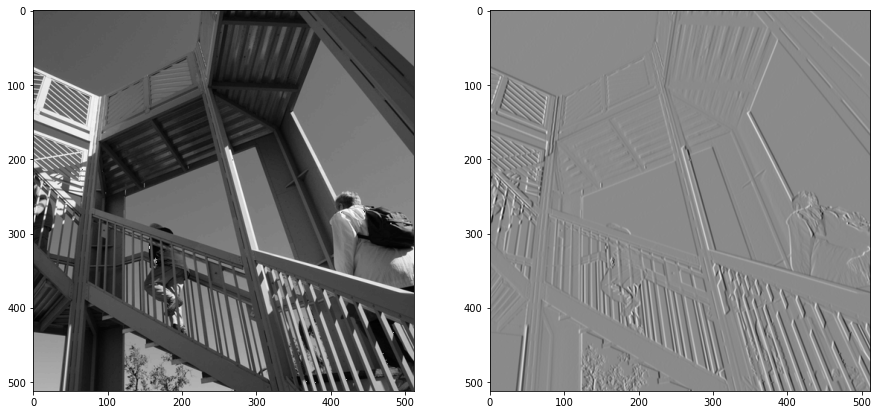

In [42]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

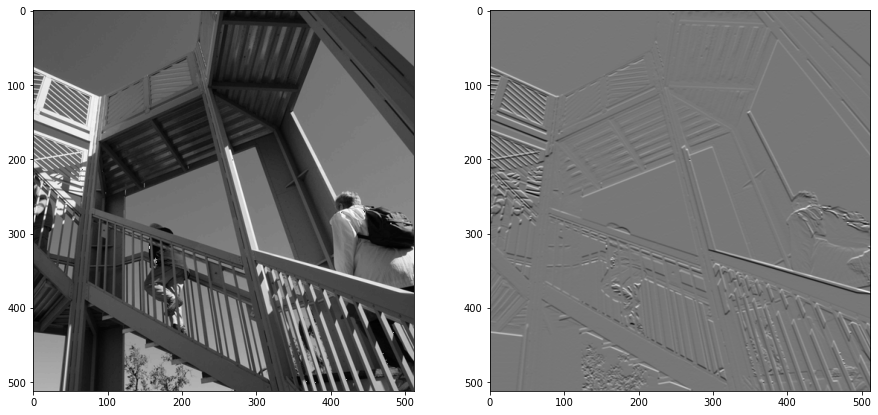

In [43]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent, axis=0)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

# Build a Model

In [44]:
# load the necessary modules
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [45]:
# load the data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

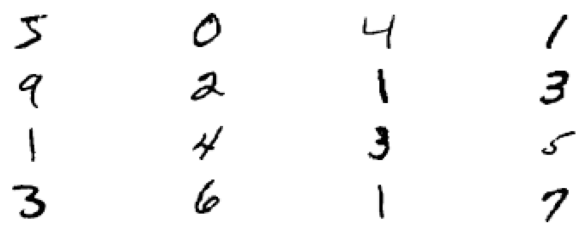

In [46]:
# inspect the data
plt.figure(figsize = (12,4))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')
    

In [47]:
# reshape and normalize the data
xtrain = xtrain.reshape(60000, 28, 28, 1)/255
xtest =  xtest.reshape(10000, 28, 28, 1)/255


In [48]:
# convert output to categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [49]:
# define the model
K.clear_session() 
model = Sequential ([
    Conv2D(filters= 50, kernel_size = (3,3), strides = (1,1), padding = 'same',
          input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2), strides=(2,2)),
    Activation('relu'),

    Flatten(),
    Dense(10),
    Activation('softmax')
    
]



)

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9800)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                98010     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 98,510
Trainable params: 98,510
Non-trainable params: 0
_________________________________________________________________


In [51]:
# compile the model
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
# fit the model
history = model.fit(xtrain, ytrain, batch_size = 100, epochs=2, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 29s 612us/sample - loss: 0.3102 - acc: 0.9138 - val_loss: 0.1301 - val_acc: 0.9647
Epoch 2/2
48000/48000 [==============================] - 30s 616us/sample - loss: 0.1050 - acc: 0.9700 - val_loss: 0.0882 - val_acc: 0.9753


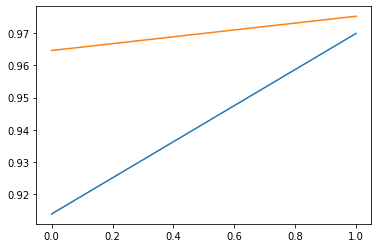

In [55]:
# plot the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


### Let's have a look at the feature maps

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

# redefine model to output right after the first hidden layer
model_small = Model(inputs=model.inputs, outputs=model.layers[1].output)
model_small.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


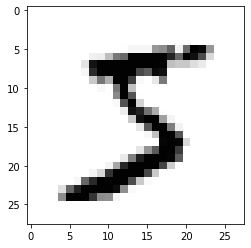

In [57]:
# load the image with the required shape
img = xtrain[0]
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

In [58]:
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
img.shape

(1, 28, 28, 1)

In [59]:
# get feature map for first hidden layer
feature_maps = model_small.predict(img)
feature_maps[0]

array([[[-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        [-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        [-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        ...,
        [-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        [-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        [-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619]],

       [[-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        [-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        [-0.02236049, -0.03606507, -0.02902731, ...,  0.01793734,
         -0.01661011, -0.02186619],
        ...,
        [-0.02236049, -0.03606507, -0.02902731, ...,  

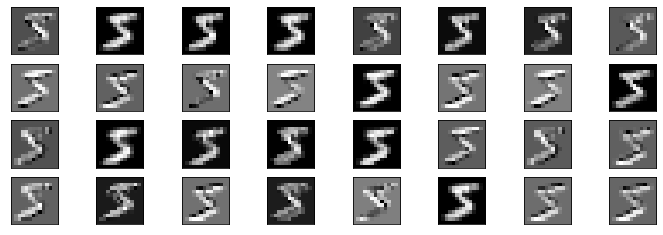

In [60]:
# plot all 32 maps in an 4*8 squares
height = 4
width = 8
ix = 1
plt.figure(figsize=(12,4))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

## Further readings

#### Stanford Ressource

https://cs231n.github.io/convolutional-networks/

#### Dive into the math behind convolutional neural networks

https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

## Visualization

#### Visualization toolbox

https://www.youtube.com/watch?v=AgkfIQ4IGaM

#### How to visualize filters in cnns

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

#### How to visualize filters in deep layers

https://www.researchgate.net/profile/Aaron_Courville/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network/links/53ff82b00cf24c81027da530.pdf